-1.1314855705173117
DOG


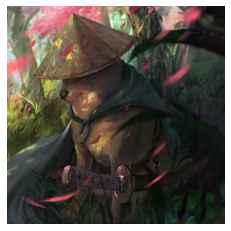

In [3]:
from cgi import test
import matplotlib.pyplot as plt
import skimage.io, skimage.color
import numpy as np
import pandas as pd

from skimage.feature import hog
from skimage.transform import resize
from skimage import data, exposure

from skimage.io import imread


df = pd.read_csv('Data_Set.csv')
df_t = pd.read_csv('Data_Set_testare.csv')


df['label'].nunique()

features = df.drop('label', axis=1)
label = df['label']


testFeatures = df_t.to_numpy() 

m,n = features.shape
A = np.append(features, np.ones((m,1)),axis = 1)


x=np.linalg.lstsq(A,label,rcond=None)[0]

i = input('Introduceti o valoare intre 0 si 13: ')

#Afisarea imaginii testate
img = imread('Smaller_Animals\\{}.jpg'.format(int(i)+1))
plt.axis("off")
plt.imshow(img,cmap="gray")

# print(img.shape)

test_label=testFeatures[int(i),:]@x[:n] + x[n]

print(test_label)

if test_label >= 0:
    print('CAT')
else: print('DOG')

